# CMPINF 2100: Homework 08

## Vedant Kansara

### Assigned: Monday November 8, 2021

### DUE: Sunday November 14 , 2021 at 11:00PM EST

You may add as many code and markdown cells as you see fit to answer the questions.

#### Write the name of your collaborators here

None.

### Overview

You will fit multiple logistic regression models with `statsmodels` and then evaluate their performance on the training set considering Accuracy, the confusion matrix, and the ROC curve.

## Import Modules
You will use the following modules in this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

You will also use the `statsmodels` formula api to fit the models.

In [2]:
import statsmodels.formula.api as smf

In addition you may use the following functions from scikit-learn to complete the assignment.

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Read data
The training data is read in for you in the cell below. As shown by the `.info()` output, there are 4 continuous inputs `x1` through `x4` and a response `y`. The response is a binary outcome that has already been encoded as 0 and 1 for you, that is why it is an integer data type. A value of 0 represents the non-event, while a value of 1 represents the event.

In [4]:
data_url = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/08/hw08_data.csv'

df = pd.read_csv(data_url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
 2   x3      500 non-null    float64
 3   x4      500 non-null    float64
 4   y       500 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [5]:
df.nunique()

x1    500
x2    500
x3    500
x4    500
y       2
dtype: int64

## Problem 01
It is always important to start out with some basic data exploration.

### 1a)

What is the fraction of observed events in the data set?

#### 1a) - SOLUTION

In [6]:
df.y.mean()

0.372

### 1b)

Use a pairs plot to visualize the histograms and scatter plots between each pair of inputs, `x1` through `x4`. Set the `hue` argument to be `y`.

#### 1b) - SOLUTION

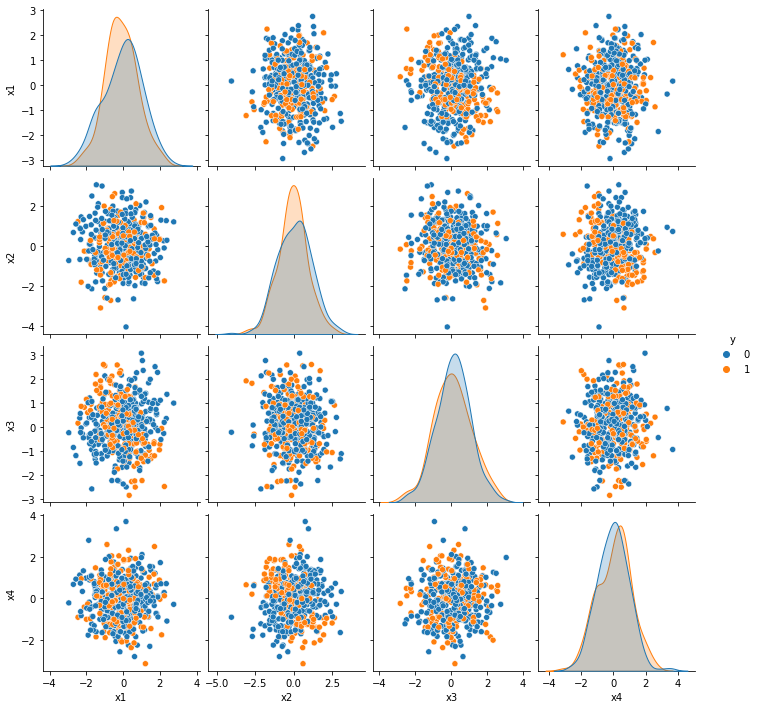

In [7]:
sns.pairplot(data = df, hue = 'y', diag_kws={'common_norm': False})

plt.show()

### 1c)
Let's reshape the data set into a long-format to help make a few additional visualizations.

Reshape `df` into long-format using the `.melt()` method. Set the `id_vars` to be `['y']` with the `value_vars` equal to the 4 inputs, `x1` through `x4`. Assign the result to the `lf` object.

#### 1c) - SOLUTION

In [8]:
lf = df.melt(id_vars = ['y'], value_vars = ['x1', 'x2', 'x3', 'x4'], ignore_index = True)

In [9]:
lf.shape

(2000, 3)

In [10]:
lf.head()

,y,variable,value
0,1,x1,-0.993816
1,1,x1,0.600514
2,1,x1,-0.272598
3,1,x1,2.000174
4,1,x1,-0.702467


### 1d)
Summarize the input variables, `x1` through `x4`, for each unique value of `y` using box plots.

**If you do not feel comfortable with your long-format object, `lf`, make 4 separate boxplot figures using `sns.catplot()`. In each figure set the `x` variable to be `'y'` and set the `y` variable to be one of the inputs.**

#### 1d) - SOLUTION

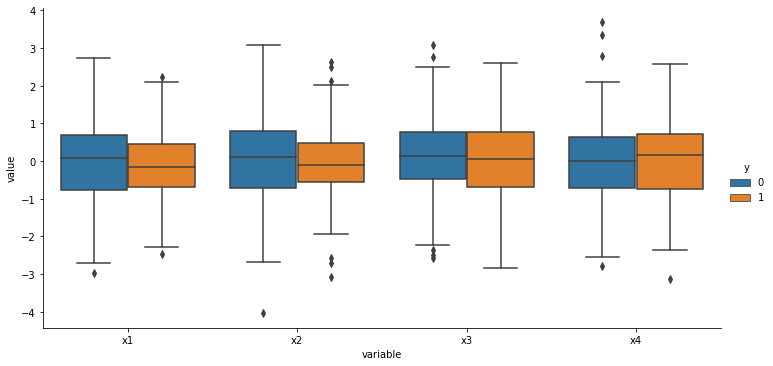

In [11]:
sns.catplot(data=lf, x='variable', y='value', hue='y', kind='box', aspect=2)

plt.show()

### 1e) 
Plot the binary outcome `y` with respect to each of the inputs using scatter plots. Because of the reshaped long-format data set, `lf`, create the figure with separate facets based on `variable`. 

Set the `alpha` argument to be 0.2 to reduce the transparency of the markers on the scatter plot.

**If you do not feel comfortable with your reshaped `lf` object, create 4 separate scatter plots, one for each input.**

#### 1e) - SOLUTION

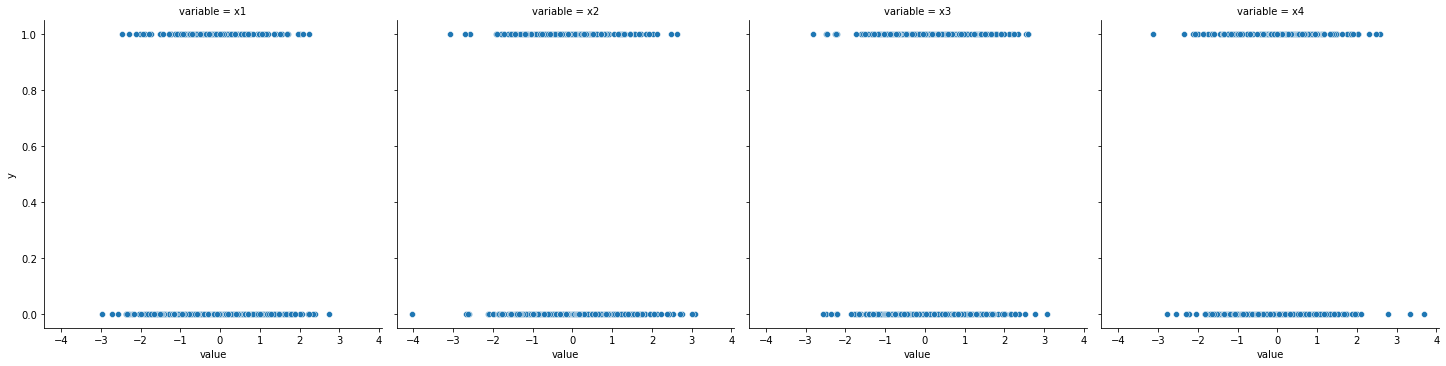

In [12]:
sns.relplot(data = lf, x='value', y='y', col='variable')

plt.show()

## Problem 02

With the basic exploration completed, it's time to fit logistic regression models. In this problem you will fit 3 models of varying complexity. You should use the `statsmodels` formula interface to fit each of the models, and so you should use the `smf.logit()` function to train each of the models.

If you would like to learn more about the details of the formula interface language, please see the documentation from the `patsy` module:

https://patsy.readthedocs.io/en/latest/formulas.html

**Note**: The discussion around the `**` operator can be helpful with the later questions in this problem.

### 2a)
Fit a logistic regression model using linear additive terms for all input variables. Assign the result to the `fit_a` object. Display the summary of the model fit to the screen.

#### 2a) - SOLUTION

In [13]:
fit_a = smf.logit(formula = 'y~ x1+ x2+ x3+ x4', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.656550
         Iterations 4


In [14]:
print(fit_a.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      495
Method:                           MLE   Df Model:                            4
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                0.005244
Time:                        17:04:54   Log-Likelihood:                -328.28
converged:                       True   LL-Null:                       -330.01
Covariance Type:            nonrobust   LLR p-value:                    0.4838
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5256      0.094     -5.615      0.000      -0.709      -0.342
x1            -0.0835      0.093     -0.903      0.367      -0.265       0.098
x2            -0.1202      0.089     -1.355      0.1

### 2b)
Fit a model with all pair-wise interactions. The formula interface includes a short cut to help create all interactions up to a certain order using the `**` operator. For example, if you were interested in creating all pair wise interactions between the `x1`, `x2`, and `x3` variables you would type into the formula interface:

`'y ~ (x1 + x2 + x3) ** 2'`

The `**` operator is equivalent to having typed out the expanded format with the `*` operator directly:  

`'y ~ (x1 + x2 + x3) * (x1 + x2 + x3)'`

You may use the `**` operator shortcut to create your model with all pair wise interactions of the 4 inputs `x1` through `x4`. Assign the result to the `fit_b` object and display the summary to the screen.

#### 2b) - SOLUTION

In [15]:
fit_b = smf.logit(formula = 'y ~ (x1 + x2 + x3 + x4) ** 2', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.467228
         Iterations 7


In [16]:
print(fit_b.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           10
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                  0.2921
Time:                        17:04:54   Log-Likelihood:                -233.61
converged:                       True   LL-Null:                       -330.01
Covariance Type:            nonrobust   LLR p-value:                 5.150e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7272      0.119     -6.133      0.000      -0.960      -0.495
x1             0.0165      0.129      0.128      0.898      -0.236       0.269
x2            -0.1852      0.132     -1.405      0.1

### 2c)
Fit a model that allows up to all 4-way interactions (interaction up to order 4) between the 4 inputs `x1` through `x4`. Assign the result to the `fit_c` object and display the summary to the screen.

#### 2c) - SOLUTION

In [17]:
fit_c = smf.logit(formula = 'y ~ (x1 + x2 + x3 + x4) ** 4', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.462024
         Iterations 7


In [18]:
print(fit_c.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      484
Method:                           MLE   Df Model:                           15
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                  0.3000
Time:                        17:04:55   Log-Likelihood:                -231.01
converged:                       True   LL-Null:                       -330.01
Covariance Type:            nonrobust   LLR p-value:                 5.445e-34
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6833      0.120     -5.676      0.000      -0.919      -0.447
x1             -0.0008      0.134     -0.006      0.995      -0.262       0.261
x2             -0.1678      0.138     -1.218    

### 2d)
How many coefficients are estimated in each of the 3 models?

#### 2d) - SOLUTION


What do you think? Add as many markdown and code cells as you see fit.

In [19]:
len(fit_a.params)

5

In [20]:
len(fit_b.params)

11

In [21]:
len(fit_c.params)

16

### 2e)
The summary displays allow you to assess which features are considered to be statistical significant. Although interpretation of the logistic regression coefficients is easier after exponentiating them, their significance can still be assessed in the log-odds scale (their display values in the table).

The cell below defines the `my_coefplot()` function for you. This function was shown in a previous lecture. It visualizes the coefficient estimates as dots and their associated confidence intervals with horizontal lines. You will use this function to visually assess which features are considered to be statistically significant.

In [22]:
def my_coefplot(model_object, figsize_use=(10, 5)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar(y = model_object.params.index,
               x = model_object.params,
               fmt = 'o', color = 'black', ecolor='black',
               xerr = 2 * model_object.bse,
               elinewidth = 3, ms=10)
    
    ax.axvline(x = 0, linestyle='--', linewidth=5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

Use the `my_coefplot()` function to plot the coefficient summaries for the `fit_a` model. Which features are statistically significant?

#### 2e) - SOLUTION

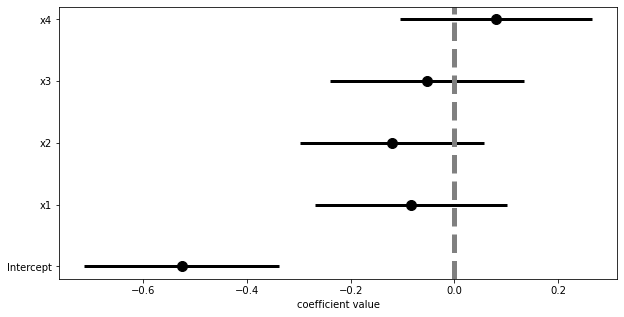

In [23]:
my_coefplot(fit_a)

### 2f)
Use the `my_coefplot()` function to plot the coefficient summaries for the `fit_b` model. Which features are statistically significant?

#### 2f) - SOLUTION

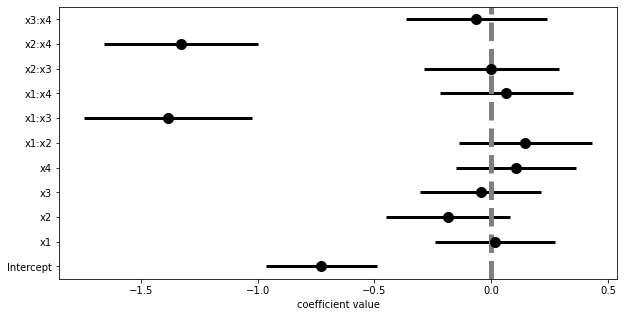

In [24]:
my_coefplot(fit_b)

### 2g) 
Use the `my_coefplot()` function to plot the coefficient summaries for hte `fit_c` model. Which features are statistically significant?

#### 2g) - SOLUTION

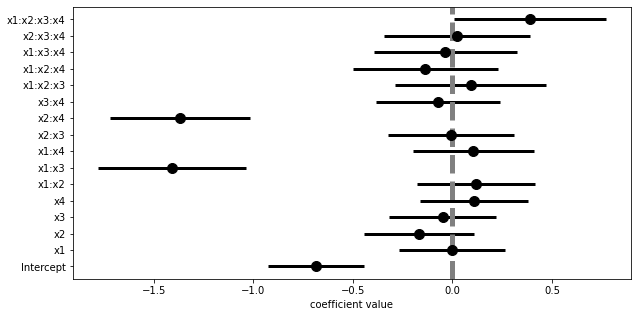

In [25]:
my_coefplot(fit_c)

### 2h)

Based on the 3 models you have fit so far, which features seem to be important?

#### 2h) - SOLUTION

Type your response here.

Based on the 3 models the intercept is the seems to be most important as it is satistically significant.

Also in model-2 and model-3 we see the intercation of `x1*x2` and `x2*x4` are statistically significant.

## Problem 03
In this problem you fit a model which includes quadratic terms and then you will visualize model behavior by making predictions. Remember that when working with the formula interfact a quadratic term can be calculated using the `np.power()` function within the formula. Thus, if you would like to write a formula for a quadratic model between the response and just the `x1` input, you would type:  

`'y ~ x1 + np.power(x1, 2)'`

### 3a)
Create a model which adds quadratic terms for each of the 4 inputs to all pair-wise interaction terms. Assign the result to the `fit_d` model and display the summary to the screen.

#### 3a) - SOLUTION

In [26]:
fit_d = smf.logit(formula = 'y ~ (x1 + x2 + x3 + x4 + np.power(x1,2) + np.power(x2,2) + np.power(x3,2) + np.power(x4,2)) ** 2', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.385132
         Iterations 8


In [27]:
print(fit_d.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      463
Method:                           MLE   Df Model:                           36
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                  0.4165
Time:                        17:04:55   Log-Likelihood:                -192.57
converged:                       True   LL-Null:                       -330.01
Covariance Type:            nonrobust   LLR p-value:                 1.460e-38
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.1542      0.260     -0.593      0.553      -0.664       0.356
x1                                 -0.2710      0.342     -0.792    

### 3b)
Use the `my_coefplot()` function to plot the coefficient summaries for the `fit_d` model. Which features are statistically significant?

#### 3b) - SOLUTION

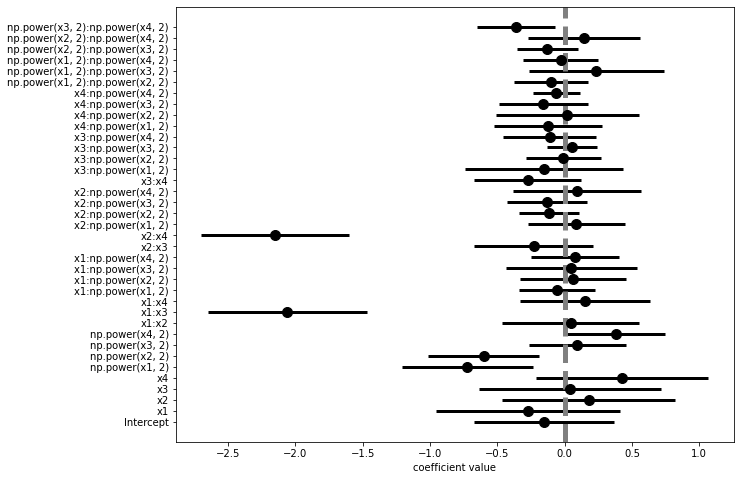

In [28]:
my_coefplot(fit_d, figsize_use=(10,8))

The interaction between `x2*x4`, `x1*x3` and np.power(x1,2), np.power(x2,2) are statistically significant

### 3c)
You will now visualize the quadratic model behavior via predictions. The predictions will be made on *prediction grid* and so there are no response values to compare the predictions to. You are using this grid to visualize the behavior of the event probability with respect to the input variables.  

Two input grids are created for you. The first, `input_grid_a`, focuses on the trends with respect to `x1` at several distinct values of `x2`, `x3`, and `x4`. The second, `input_grid_b`, focuses instead on the trends with respect to `x2` at several distinct values of `x1`, `x3`, and `x4`.

In [29]:
input_grid_a = pd.DataFrame([ (xa, xb, xc, xd) for xa in np.linspace(-3, 3, num=25)
                            for xb in [-2., 0., 2.]
                            for xc in [-2., 2.]
                            for xd in [-2., 2.]],
                           columns = ['x1', 'x2', 'x3', 'x4'])

input_grid_b = pd.DataFrame([ (xa, xb, xc, xd) for xa in [-2., 0., 2.]
                            for xb in np.linspace(-3, 3, num=25)
                            for xc in [-2., 2.]
                            for xd in [-2., 2.]],
                           columns = ['x1', 'x2', 'x3', 'x4'])

The `.info()` method is displayed for you for the `input_grid_a` DataFrame.

In [30]:
input_grid_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   x3      300 non-null    float64
 3   x4      300 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


Confirm the number of unique values for each input in the `input_grid_a` DataFrame.

#### 3c) - SOLUTION

In [31]:
input_grid_a.nunique()

x1    25
x2     3
x3     2
x4     2
dtype: int64

### 3d)
Predict the event probability using the model with quadratic terms (`fit_d`) associated with the `input_grid_a` set of inputs. Assign the result to a new column in `input_grid_a` named `pred_probability`.

#### 3d) - SOLUTION

In [32]:
input_grid_a['pred_probability'] = fit_d.predict(input_grid_a)

In [33]:
input_grid_a.head()

,x1,x2,x3,x4,pred_probability
0,-3.0,-2.0,-2.0,-2.0,1.251526e-11
1,-3.0,-2.0,-2.0,2.0,1.387722e-06
2,-3.0,-2.0,2.0,-2.0,5.842985e-02
3,-3.0,-2.0,2.0,2.0,9.885620e-01
4,-3.0,0.0,-2.0,-2.0,1.689868e-04


### 3e)
Visualize the trends of the event probability with respect to `x1` using a line plot in Seaborn where the `hue` is set to `x2`. It is recommended to use the `sns.relplot()` function that way you can set the facets based on the `x3` and `x4` input values. You should have the columns associated with `x3` and the rows associated with `x4`.

#### 3e) - SOLUTION

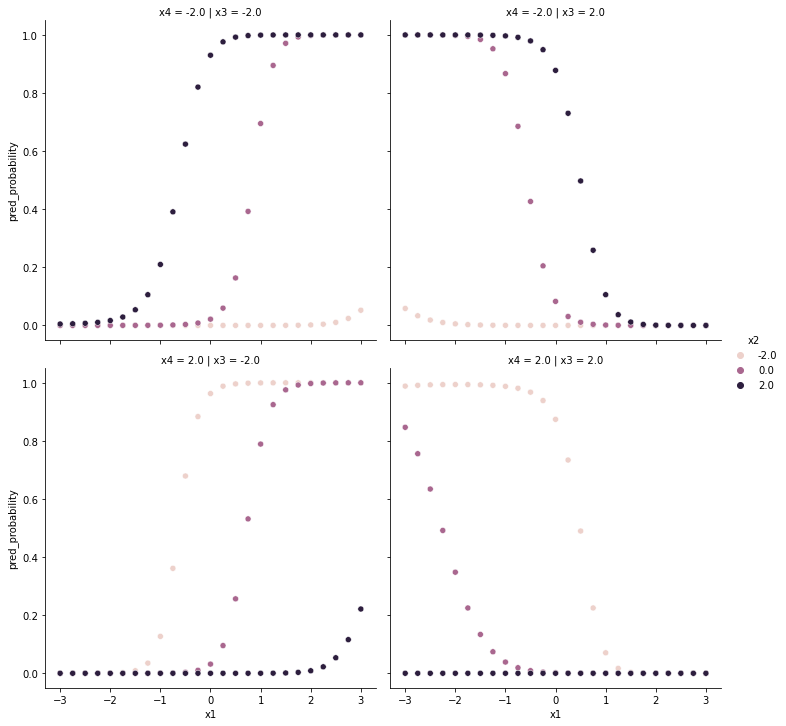

In [34]:
sns.relplot(data= input_grid_a, x='x1', y = 'pred_probability', hue = 'x2', col = 'x3', row='x4')

plt.show()

### 3f)
Predict the event probability using the model with quadratic terms (`fit_d`) associated with the `input_grid_b` set of inputs. Assign the result to a new column in `input_grid_b` named `pred_probability`.

#### 3f) - SOLUTION

In [35]:
input_grid_b['pred_probability'] = fit_d.predict(input_grid_b)

In [36]:
input_grid_b.head()

,x1,x2,x3,x4,pred_probability
0,-2.0,-3.00,-2.0,-2.0,5.655151e-14
1,-2.0,-3.00,-2.0,2.0,1.102365e-03
2,-2.0,-3.00,2.0,-2.0,3.048351e-06
3,-2.0,-3.00,2.0,2.0,9.986634e-01
4,-2.0,-2.75,-2.0,-2.0,4.498422e-13


### 3g)
Visualize the trends of the event probability with respect to `x2` using a line plot in Seaborn where the `hue` is set to `x1`. It is recommended to use the `sns.relplot()` function that way you can set the facets based on the `x3` and `x4` input values. You should have the columns associated with `x3` and the rows associated with `x4`.

#### 3g) - SOLUTION

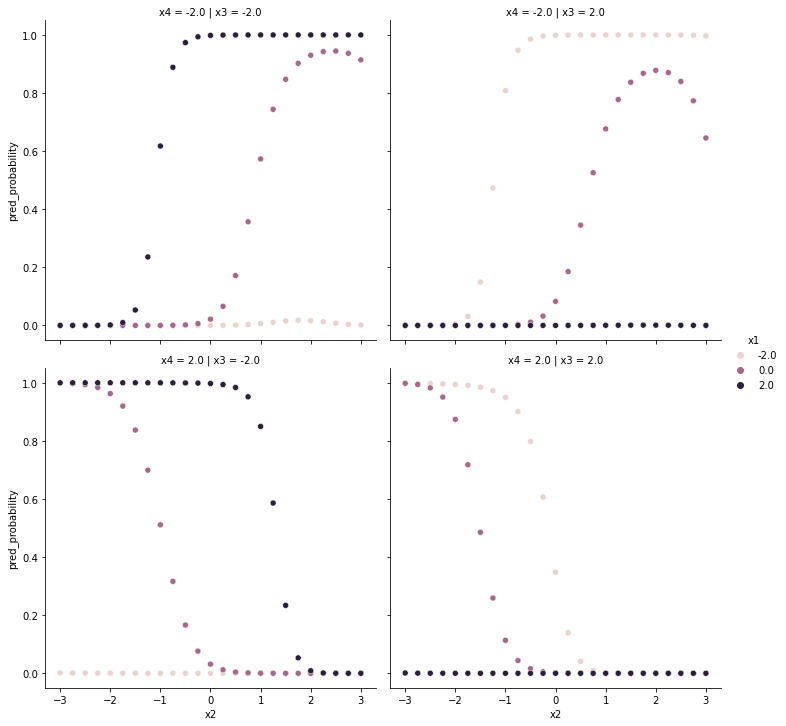

In [37]:
sns.relplot(data= input_grid_b, x='x2', y = 'pred_probability', hue = 'x1', col = 'x3', row='x4')

plt.show()

### 3h)
You visualized the predictive trends of the event probability with respect to two different inputs. Do the trends with respect to `x1` depend on the other inputs? Do the trends with respect to `x2` depend on the other inputs?

#### 3h) - SOLUTION
Type your solution here.

We can see the trend of `x1` is dependent on other variables as the probablity of x1 changes with respect to change in x2,x3,x4.

Same is true for the the `x2`

## Problem 04
Now that you have fit models, looked at their coefficients, and visualized some trends, it's time to assess the model performance. In this problem you will make predictions on the training set for each model, then classify those predictions assuming a threshold of 0.5. 

The cell below makes a copy of the `df` object for you, that way the original DataFrame is unchanged.

In [38]:
df_copy = df.copy()

### 4a)
Make predictions on the training set for each of the 4 models you fit in the previous two questions. Assign the predictions as new columns to the `df_copy` DataFrame. The columns are named to be consistent with the models they are associated with. For example, `pred_prob_a` is the predicted probability associated with model `fit_a`.

#### 4a) - SOLUTION

In [39]:
df_copy['pred_prob_a'] = fit_a.predict(df)

df_copy['pred_prob_b'] = fit_b.predict(df)

df_copy['pred_prob_c'] = fit_c.predict(df)

df_copy['pred_prob_d'] = fit_c.predict(df)

### 4b)
Classify the predictions associated with each of the models using a threshold of 0.5. The classifications are assigned to new columns of the `df_copy` DataFrame. The column names are consistent with the models they are associated with. For example, `pred_class_a` is the predicted classifiation associated with `fit_a`. The classifications should be consistent with the encoding of the binary outcome `y`. Thus, if the predicted probability is greater than the threshold assign the class to be 1, otherwise assign the class to be 0.

#### 4b) - SOLUTION

In [40]:
df_copy['pred_class_a'] = np.where( df_copy['pred_prob_a'] > 0.5, 1, 0)

df_copy['pred_class_b'] = np.where( df_copy['pred_prob_b'] > 0.5, 1, 0)

df_copy['pred_class_c'] = np.where( df_copy['pred_prob_c'] > 0.5, 1, 0)

df_copy['pred_class_d'] = np.where( df_copy['pred_prob_d'] > 0.5, 1, 0)

### 4c)
Calculate the Accuracy associated with each of the 4 models on the training set. Display the Accuracy values to the screen.

#### 4c) - SOLUTION

For model - a

In [41]:
df_copy.loc[ df_copy.y == df_copy['pred_class_a'] ].shape[0] / df_copy.shape[0]

0.628

For model - b

In [42]:
df_copy.loc[ df_copy.y == df_copy['pred_class_b'] ].shape[0] / df_copy.shape[0]

0.77

For model - c

In [43]:
df_copy.loc[ df_copy.y == df_copy['pred_class_c'] ].shape[0] / df_copy.shape[0]

0.776

For model - d

In [44]:
df_copy.loc[ df_copy.y == df_copy['pred_class_d'] ].shape[0] / df_copy.shape[0]

0.776

### 4d)
Calculate and display the confusion matrix associated with each model to the screen. Calculate the confusion matrix based on the 0.5 threshold that you used to classify the predictions.

#### 4d) - SOLUTION

For model - a

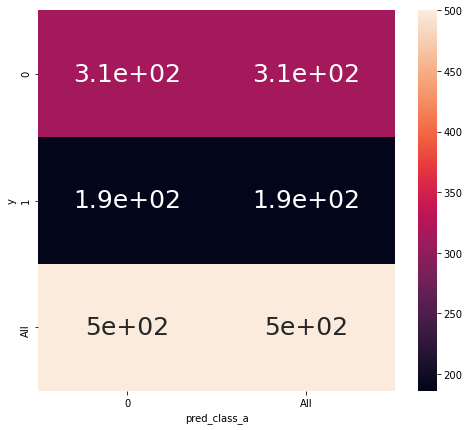

In [45]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.y, df_copy.pred_class_a, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

For model - b

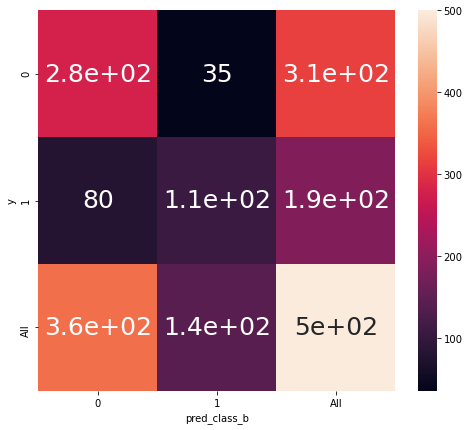

In [46]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.y, df_copy.pred_class_b, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

For model - c

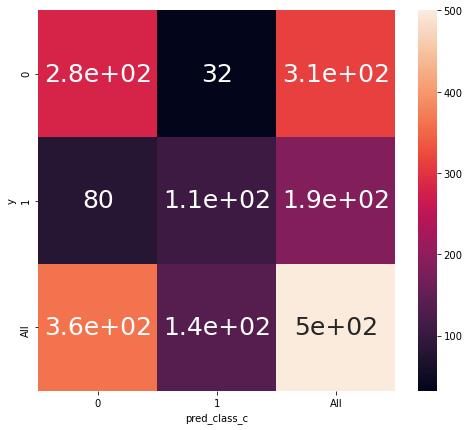

In [47]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.y, df_copy.pred_class_c, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

For model - d

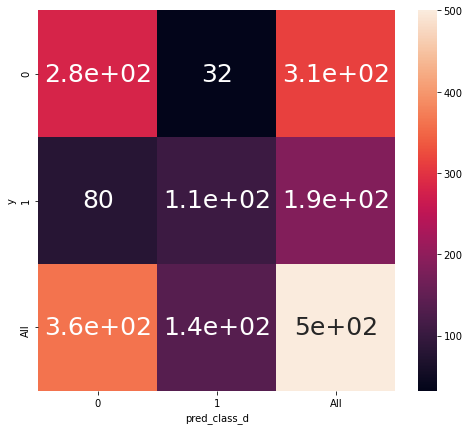

In [48]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.y, df_copy.pred_class_d, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

### 4e)
You will now consider the model performances using the ROC curve which varies the threshold from near 0 to near 1. In this problem you must calculate the False-Positive Rate (FPR), the True-Positive Rate (TPR) and threshold values associated with the ROC curve for all 4 models. You may use the `roc_curve` function from scikit-learn to complete this problem. 

The comments in the cell below tell you which model you should use when calling the `roc_curve()` function.

#### 4e) - SOLUTION

In [49]:
# use the predictions associated with with fit_a
fpr_a, tpr_a, threshold_a = roc_curve(df_copy.y.to_numpy(), df_copy['pred_prob_a'].to_numpy())
res_a = pd.DataFrame({'fpr': fpr_a, 'tpr': tpr_a, 'threshold': threshold_a})

# use the predictions associated with fit_b
fpr_b, tpr_b, threshold_b = roc_curve(df_copy.y.to_numpy(), df_copy['pred_prob_b'].to_numpy())
res_b = pd.DataFrame({'fpr': fpr_b, 'tpr': tpr_b, 'threshold': threshold_b})

# use the predictions associated with fit_c
fpr_c, tpr_c, threshold_c = roc_curve(df_copy.y.to_numpy(), df_copy['pred_prob_c'].to_numpy())
res_c = pd.DataFrame({'fpr': fpr_c, 'tpr': tpr_c, 'threshold': threshold_c})

# use the predictions associated with fit_d
fpr_d, tpr_d, threshold_d = roc_curve(df_copy.y.to_numpy(), df_copy['pred_prob_b'].to_numpy())
res_d = pd.DataFrame({'fpr': fpr_d, 'tpr': tpr_d, 'threshold': threshold_d})

### 4f)
Plot the ROC curves associated with each model. You should include the diagonal "45-degree" line in your figure. You may plot all ROC curves on a single figure or across multiple figures.

#### 4f) - SOLUTION

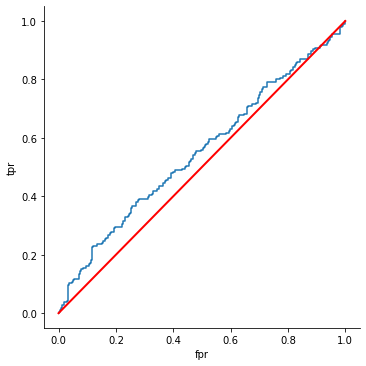

In [50]:
sns.relplot(data = res_a, x='fpr', y='tpr',
            estimator=None, 
            kind='line',
            drawstyle='steps-post'
            )

plt.plot([0, 1], [0, 1], linewidth=2, color='r')


plt.show()

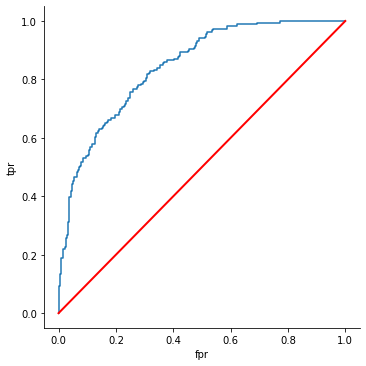

In [51]:
sns.relplot(data = res_b, x='fpr', y='tpr',
            estimator=None, 
            kind='line',
            drawstyle='steps-post',
            )

plt.plot([0, 1], [0, 1], linewidth=2, color='r')

plt.show()

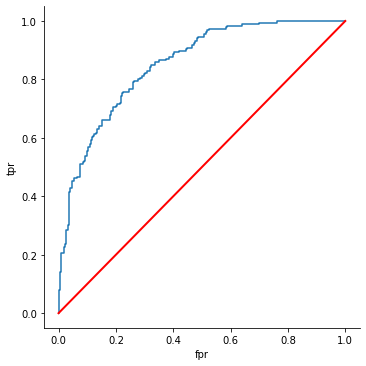

In [52]:
sns.relplot(data = res_c, x='fpr', y='tpr',
            estimator=None, 
            kind='line',
            drawstyle='steps-post',
            )

plt.plot([0, 1], [0, 1], linewidth=2, color='r')

plt.show()

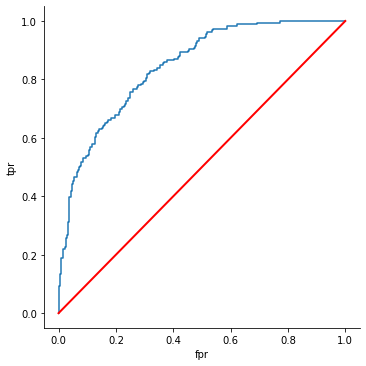

In [53]:
sns.relplot(data = res_d, x='fpr', y='tpr',
            estimator=None, 
            kind='line',
            drawstyle='steps-post',
            )
plt.plot([0, 1], [0, 1], linewidth=2, color='r')

plt.show()

### 4g)
Calculate the Area Under the Curve (AUC) for each of the 4 models. You may use the `roc_auc_score()` function from scikit-learn to calculate the AUC score. Which model essentially corresponds to random guessing?

#### 4g) - SOLUTION

In [54]:
auc_a = roc_auc_score(df_copy.y, df_copy.pred_prob_a)

In [55]:
auc_a

0.5513149784261352

In [56]:
auc_b = roc_auc_score(df_copy.y, df_copy.pred_prob_b)

In [57]:
auc_b

0.8435723580576673

In [58]:
auc_c = roc_auc_score(df_copy.y, df_copy.pred_prob_c)

In [59]:
auc_c

0.851191699198685

In [60]:
auc_d = roc_auc_score(df_copy.y, df_copy.pred_prob_d)

In [61]:
auc_d

0.851191699198685

Model `a` essentially corresponds to random guessing